In [109]:
!wget -q '/content/tiki_scraping.db'

In [110]:
import sqlite3
conn = sqlite3.connect('tiki_scraping.db')
import pandas as pd
import seaborn as sns

In [ ]:
query = '''
SELECT url
FROM categories a

'''
pd.read_sql_query(query, conn)

,url
0,https://tiki.vn/dien-thoai-may-tinh-bang/c1789...
1,https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?...
2,https://tiki.vn/thiet-bi-kts-phu-kien-so/c1815...
3,https://tiki.vn/laptop-may-vi-tinh/c1846?src=c...
4,https://tiki.vn/may-anh/c1801?src=c.1801.hambu...
...,...
2649,https://tiki.vn/the-thao/c1975?src=c.1975.hamb...
2650,https://tiki.vn/o-to-xe-may-xe-dap/c8594?src=c...
2651,https://tiki.vn/hang-quoc-te/c17166?src=c.1716...
2652,https://tiki.vn/nha-sach-tiki/c8322?src=c.8322...


In [111]:
query = '''
WITH lowest_sub as 
(SELECT a.id as parent, a.url as url, b.id as child
FROM categories as a
LEFT JOIN categories as b ON a.id = b.parent_id
WHERE child IS NULL)

SELECT parent as id, url
FROM lowest_sub

'''
pd.read_sql_query(query, conn)

,id,url
0,14,https://tiki.vn/dien-thoai-smartphone/c1795?sr...
1,15,https://tiki.vn/dien-thoai-pho-thong/c1796?src...
2,16,https://tiki.vn/dien-thoai-ban/c8061?src=c.178...
3,17,https://tiki.vn/may-doc-sach/c28856?src=c.1789...
4,18,https://tiki.vn/may-tinh-bang/c1794?src=c.1789...
...,...,...
869,996,https://tiki.vn/me-va-be/c2549?src=c.2549.hamb...
870,997,https://tiki.vn/lam-dep-suc-khoe/c1520?src=c.1...
871,998,https://tiki.vn/o-to-xe-may-xe-dap/c8594?src=c...
872,999,https://tiki.vn/hang-quoc-te/c17166?src=c.1716...


In [ ]:
query = '''
SELECT COUNT(id)
FROM categories
WHERE parent_id <16
GROUP BY parent_id
'''
pd.read_sql_query(query, conn)

In [112]:
query1 = '''
SELECT * 
FROM categories
LIMIT 2
'''
pd.read_sql_query(query1, conn)

,id,name,url,parent_id,create_at
0,1,Điện Thoại - Máy Tính Bảng,https://tiki.vn/dien-thoai-may-tinh-bang/c1789...,None,2021-04-10 15:47:17
1,2,Điện Tử - Điện Lạnh,https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?...,None,2021-04-10 15:47:17


In [113]:
query2 = '''
SELECT * 
FROM products
LIMIT 2'''
pd.read_sql_query(query2, conn)

,id,Product_name,sku,Price,Image,Product_URL,Reviews,Stars,Discount,Tikinow,Freeship,Badge_under_price,Installment,Gift,main_id,create_at
0,1,Điện Thoại Samsung Galaxy M31 (6GB/128GB) - Hà...,9643084252296,4790000,https://salt.tikicdn.com/cache/280x280/ts/prod...,https://tiki.vn/dien-thoai-samsung-galaxy-m31-...,1677,4.7,26,1,0,1,1,0,14,2021-04-11 04:12:02
1,2,Điện Thoại Oppo A12 (3GB/32GB) - Hàng Chính Hãng,8020626062208,2490000,https://salt.tikicdn.com/cache/280x280/ts/prod...,https://tiki.vn/dien-thoai-oppo-a12-3gb-32gb-h...,170,4.7,17,1,0,0,0,0,14,2021-04-11 04:12:02


In [115]:
query1 = '''
SELECT c.name as Category, COUNT(p.id) as Number_of_products
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query1, conn)

,Category,Number_of_products
0,Điện Thoại - Máy Tính Bảng,172
1,Điện Tử - Điện Lạnh,1724
2,Phụ Kiện - Thiết Bị Số,3434
3,Laptop - Thiết bị IT,3958
4,Máy Ảnh - Quay Phim,3797
5,Điện Gia Dụng,2936
6,Nhà Cửa Đời Sống,19781
7,Hàng Tiêu Dùng - Thực Phẩm,563
8,"Đồ chơi, Mẹ & Bé",289
9,"Xe Máy, Ô tô, Xe Đạp",28


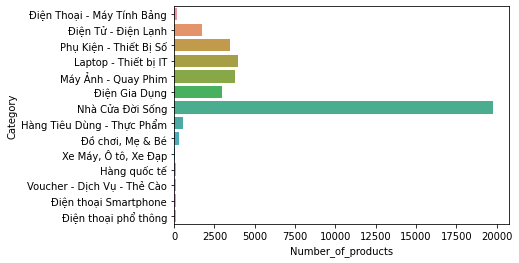

In [114]:
#Total product for each group
query1 = '''
SELECT c.name as Category, COUNT(p.id) as Number_of_products
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id

'''
df = pd.read_sql_query(query1, conn)
sns.barplot(data=df, y='Category', x = 'Number_of_products')

In [116]:
#Most expensive of each group
query2 = '''
SELECT p.Product_name, MAX(p.price) as Most_expensive, c.name as Category
FROM products as p
JOIN categories as c WHERE p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query2, conn)

,Product_name,Most_expensive,Category
0,Surface Pro 6 Intel Core I7 Ram 16GB SSD 1TB (...,55880000,Điện Thoại - Máy Tính Bảng
1,Android Tivi Sharp 8K 80 inch 8T-80AX1X,356390000,Điện Tử - Điện Lạnh
2,Bảng Vẽ Wacom Cintiq Pro 24 23.6inch - Pen & T...,71000000,Phụ Kiện - Thiết Bị Số
3,Bộ lưu điện Santak True Online 3/3 20KVA - Mod...,180000000,Laptop - Thiết bị IT
4,Máy Quay Canon EOS C300 MK II - Hàng Chính Hãng,252000000,Máy Ảnh - Quay Phim
5,Máy làm kem Ý MEHEN M5 2300W - Hàng Nhập Khẩu,150000000,Điện Gia Dụng
6,ĐÀN PIANO ĐIỆN YAMAHA CVP 705,118000000,Nhà Cửa Đời Sống
7,Tổ Yến Sào Khánh Hòa Nest - 100g ( Yến Tinh Chế ),4400000,Hàng Tiêu Dùng - Thực Phẩm
8,05 Hộp Sữa Bột Ensure Úc Vị Vani (850g),2750000,"Đồ chơi, Mẹ & Bé"
9,Xe scooter thể thao gấp gọn Homesheel AONE X P...,16990000,"Xe Máy, Ô tô, Xe Đạp"


In [124]:
#Biggest discount items for each category
query4 = '''
WITH discount AS
(SELECT c.name as Category, AVG(Discount) as avg_discount
FROM products as p
JOIN categories as c WHERE p.main_id = c.id
GROUP BY p.main_id)

SELECT Category, MAX(avg_discount) as Max_discount
FROM discount
'''
pd.read_sql_query(query4, conn)

,Category,Max_discount
0,Hàng quốc tế,44.166667


In [118]:
#discount average
query2 = '''
SELECT AVG(p.Discount) as avg_discount, c.name as Category
FROM products as p
JOIN categories as c WHERE p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query2, conn)

,avg_discount,Category
0,21.808140,Điện Thoại - Máy Tính Bảng
1,30.910673,Điện Tử - Điện Lạnh
2,38.130751,Phụ Kiện - Thiết Bị Số
3,25.628348,Laptop - Thiết bị IT
4,30.374243,Máy Ảnh - Quay Phim
5,30.417575,Điện Gia Dụng
6,34.737071,Nhà Cửa Đời Sống
7,21.747780,Hàng Tiêu Dùng - Thực Phẩm
8,12.083045,"Đồ chơi, Mẹ & Bé"
9,20.107143,"Xe Máy, Ô tô, Xe Đạp"


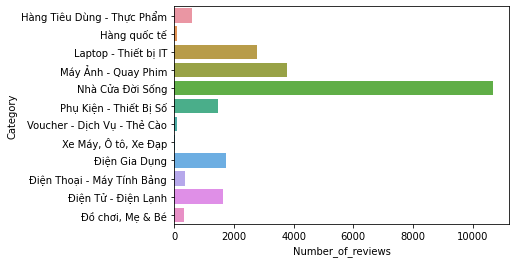

In [86]:
#Number of reviews for each Category
query = '''
SELECT c.name as Category, COUNT(p.Reviews) as Number_of_reviews
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY Category
'''
df  = pd.read_sql_query(query, conn)
sns.barplot(data=df, x ='Number_of_reviews', y ='Category')

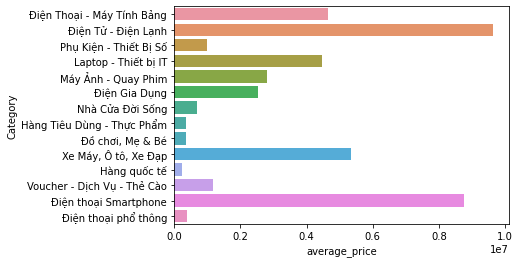

In [119]:
#Average price of each group 
query5 = '''
SELECT AVG(p.price) as average_price, c.name as Category
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id
'''
df = pd.read_sql_query(query5, conn)
sns.barplot(data =df, x = 'average_price', y = 'Category')

In [120]:
query5 = '''
SELECT AVG(p.price) as average_price, c.name as Category
FROM products as p
JOIN categories as c ON p.main_id = c.id
GROUP BY p.main_id
'''
pd.read_sql_query(query5, conn)

,average_price,Category
0,4.660295e+06,Điện Thoại - Máy Tính Bảng
1,9.637769e+06,Điện Tử - Điện Lạnh
2,9.945053e+05,Phụ Kiện - Thiết Bị Số
3,4.464732e+06,Laptop - Thiết bị IT
4,2.799327e+06,Máy Ảnh - Quay Phim
5,2.546793e+06,Điện Gia Dụng
6,6.922690e+05,Nhà Cửa Đời Sống
7,3.700750e+05,Hàng Tiêu Dùng - Thực Phẩm
8,3.441456e+05,"Đồ chơi, Mẹ & Bé"
9,5.357271e+06,"Xe Máy, Ô tô, Xe Đạp"
